# Created by Do Ngoc Chi Cong

In [3]:
import os
import string
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

# 1. Load Data

In [5]:
pre_seq_no_w_temp = list(pd.read_csv("1. Data -  TongHop/Sequence_Text.csv")["text"])
pre_seq_no_w_temp[0:10]

['Multiple factors make it a candidate wellsuited for further study using NASAs James Webb Space Telescope',
 'Hurt CaltechIPAC TESS stares at a large swath of the sky for about a month at a time tracking the brightness changes of tens of thousands of stars at intervals ranging from  seconds to  minutes',
 'Capturing transits  brief regular dimmings of stars caused by the passage of orbiting worlds  is one of the missions primary goals',
 'Although we dont yet know whether it possesses an atmosphere weve been thinking of it as an exoVenus with similar size and energy received from its star as our planetary neighbor in the solar system',
 'The host star called Gliese  is a cool red dwarf located almost  lightyears away in the constellation Pisces',
 'The star is only about  of the Suns size with about  of the Suns surface temperature',
 'days and is Earths size or slightly smaller  comparable to Venus',
 'Assuming it has no atmosphere the planet has a surface temperature estimated at ar

In [6]:
pre_seq_no_w = []
for i in pre_seq_no_w_temp:
  pre_seq_no_w.append(i.replace(".","")+" eos")

In [7]:
pre_seq_no_w[0:10]

['Multiple factors make it a candidate wellsuited for further study using NASAs James Webb Space Telescope eos',
 'Hurt CaltechIPAC TESS stares at a large swath of the sky for about a month at a time tracking the brightness changes of tens of thousands of stars at intervals ranging from  seconds to  minutes eos',
 'Capturing transits  brief regular dimmings of stars caused by the passage of orbiting worlds  is one of the missions primary goals eos',
 'Although we dont yet know whether it possesses an atmosphere weve been thinking of it as an exoVenus with similar size and energy received from its star as our planetary neighbor in the solar system eos',
 'The host star called Gliese  is a cool red dwarf located almost  lightyears away in the constellation Pisces eos',
 'The star is only about  of the Suns size with about  of the Suns surface temperature eos',
 'days and is Earths size or slightly smaller  comparable to Venus eos',
 'Assuming it has no atmosphere the planet has a surface

### Tokenize

In [8]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pre_seq_no_w)
total_words = len(tokenizer.word_index) + 1

In [9]:
print(total_words)

3710


In [10]:
# Create input sequences
input_sequences = []
ending_words = []
for line in pre_seq_no_w:
    token_list = tokenizer.texts_to_sequences([line])[0]
    ending_words.append(tokenizer.index_word[token_list[-1]])
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [11]:
input_sequences[:5]

[[337, 897],
 [337, 897, 96],
 [337, 897, 96, 10],
 [337, 897, 96, 10, 4],
 [337, 897, 96, 10, 4, 898]]

In [12]:
ending_words[:5]

['eos', 'eos', 'eos', 'eos', 'eos']

In [13]:
np.unique(ending_words)

array(['eos'], dtype='<U3')

# Tần xuất xuất hiện từ:

In [14]:
!python -m pip install wordcloud

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
def compute_word_frequencies(text):
    words = nltk.word_tokenize(text)
    word_frequencies = Counter(words)
    return word_frequencies

In [17]:
def generate_word_cloud(word_frequencies):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [18]:
def generate_bar_chart(word_frequencies, num_words=10):
    most_common_words = word_frequencies.most_common(num_words)
    words = [word for word, freq in most_common_words]
    frequencies = [freq for word, freq in most_common_words]

    plt.figure(figsize=(100, 5))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title('Top {} Most Common Words'.format(num_words))
    plt.show()

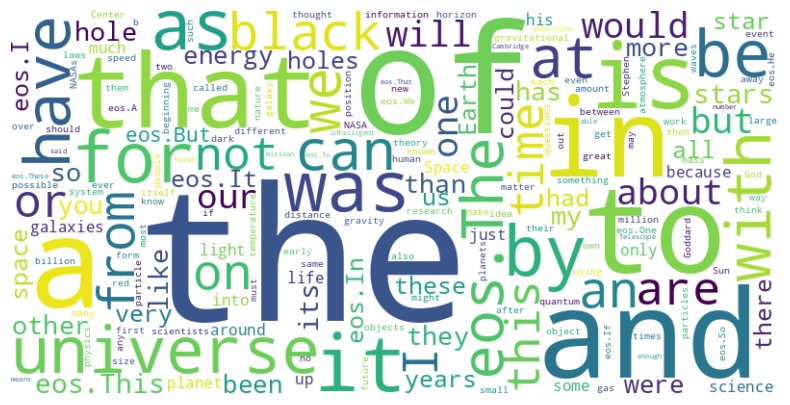

In [19]:
text = '.'.join(pre_seq_no_w)
# Compute word frequencies
word_frequencies = compute_word_frequencies(text)

# Generate and display the word cloud
generate_word_cloud(word_frequencies)


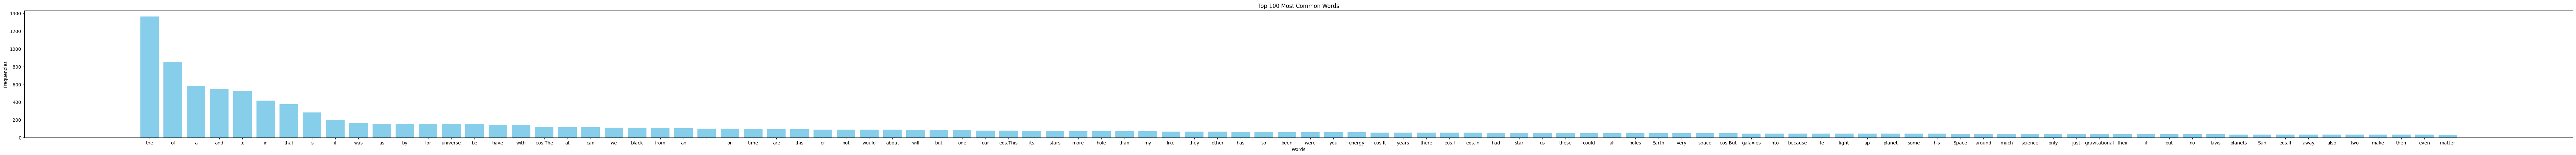

In [20]:

# Generate and display the bar chart for the top 10 most common words
generate_bar_chart(word_frequencies, num_words=100)

# 2. Splitting Data Training, Testing

In [21]:
# Pad sequences and split into predictors and label
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(input_sequences, test_size=0.2, random_state=42)

In [23]:
X_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1562,
        1563, 1564,    1,  102,   30,   16, 1580,  107,  245],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  562,   27,    4,  116, 1502,    1,
         817, 1503,    4,  266,   11,   10,  805, 1035,  215,    5,   92,
         787,    1,  133,  142,    1,  267,    3,   82,  563],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0

In [24]:
X_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  220,    4,  378,    1,  487],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 1012,    1,  443,    3,  795,   10,   15,
         198,    8,   48,  372,  776,   93, 1720, 1171,  313],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0

# 3. Training Model

In [25]:
X, y = X_train[:, :-1], X_train[:, -1]

In [26]:
# Convert target data to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [27]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# CNN + LSTM with NLP

In [28]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Concatenate, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

In [29]:
# Xây dựng mô hình CNN-LSTM-RAND
def create_cnn_lstm_rand_model():
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Conv1D(100, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(total_words, activation="softmax"))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model2 = create_cnn_lstm_rand_model()

In [30]:
import tensorflow as tf

# Load the SavedModel
model2 = tf.keras.models.load_model('GenerationTestingCNN_Ver6.keras')

In [31]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 63, 100)           371000    
                                                                 
 conv1d_7 (Conv1D)           (None, 63, 100)           10100     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 63, 100)           0         
 g1D)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                      

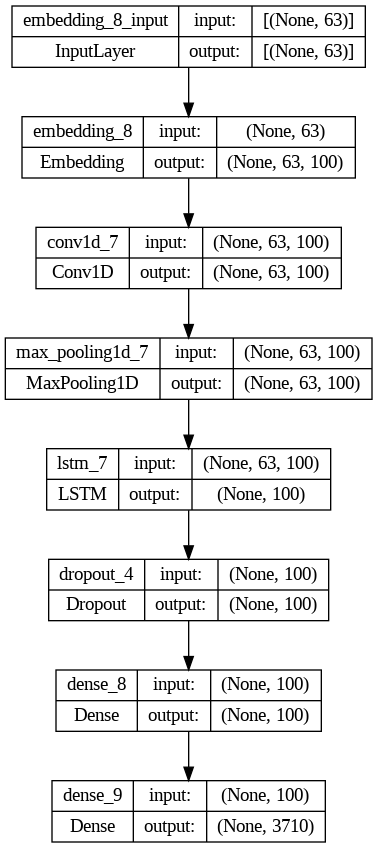

In [32]:
plot_model(model2, to_file='LSTM_LSTM.png', show_shapes=True, show_layer_names=True)

In [52]:
# Train the model
history2=model2.fit(X, y, epochs=50,verbose=1).history

Epoch 1/50
574/574 [==============================] - 9s 15ms/step - loss: 0.9477 - accuracy: 0.7359
Epoch 2/50
574/574 [==============================] - 5s 9ms/step - loss: 0.9616 - accuracy: 0.7374
Epoch 3/50
574/574 [==============================] - 4s 8ms/step - loss: 0.9621 - accuracy: 0.7336
Epoch 4/50
574/574 [==============================] - 5s 8ms/step - loss: 0.9679 - accuracy: 0.7356
Epoch 5/50
574/574 [==============================] - 5s 8ms/step - loss: 0.9659 - accuracy: 0.7389
Epoch 6/50
574/574 [==============================] - 4s 8ms/step - loss: 0.9596 - accuracy: 0.7362
Epoch 7/50
574/574 [==============================] - 5s 9ms/step - loss: 0.9812 - accuracy: 0.7346
Epoch 8/50
574/574 [==============================] - 5s 8ms/step - loss: 0.9636 - accuracy: 0.7362
Epoch 9/50
574/574 [==============================] - 4s 8ms/step - loss: 0.9344 - accuracy: 0.7446
Epoch 10/50
574/574 [==============================] - 5s 9ms/step - loss: 0.9707 - accuracy: 0.736

In [53]:
model2.save("GenerationTestingCNN_Ver6.keras")

In [54]:
import json
history_dict = history2
with open('GenerationTestingCNN_Ver6.json', 'w') as f:
    json.dump(history_dict, f)

# 4. Score on testing

In [55]:
X_Test, y_test = X_train[:, :-1], X_train[:, -1]

In [56]:
X_Test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1562,
        1563, 1564,    1,  102,   30,   16, 1580,  107],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  562,   27,    4,  116, 1502,    1,
         817, 1503,    4,  266,   11,   10,  805, 1035,  215,    5,   92,
         787,    1,  133,  142,    1,  267,    3,   82],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0

In [57]:
# Convert target data to one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=total_words)

In [58]:
y_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
y_pred = model2.predict(X_Test)

574/574 [==============================] - 2s 3ms/step


In [60]:
y_pred[:5]

array([[0.0000000e+00, 1.1183807e-09, 2.2342035e-21, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.7686017e-18, 1.7566247e-08, 1.4084978e-07, ..., 1.8292656e-37,
        8.6888210e-18, 2.6986327e-17],
       [0.0000000e+00, 1.6409988e-13, 2.4454282e-19, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.3804564e-22, 1.5707337e-03, 7.3400646e-04, ..., 0.0000000e+00,
        7.8149666e-22, 6.7384745e-34],
       [3.0307736e-23, 5.9295917e-07, 1.1708578e-06, ..., 0.0000000e+00,
        2.9513871e-23, 3.8056630e-31]], dtype=float32)

In [61]:
predictions = np.argmax(y_pred, axis=1)
print(predictions)

[245 563   3 ... 468   4 984]


In [62]:
true_labels = np.argmax(y_test, axis=1)
print(true_labels)

[245 563   3 ... 468   4 984]


In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
# Evaluate predictions
accuracy = accuracy_score(true_labels, predictions)

In [65]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9078137762047372


# 5. Apply

In [75]:
# Generate next word predictions
seed_text = "The dark energy"
next_words = 10

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 103ms/step
Next predicted words: The dark energy are predicted by partnership with the universities of cambridge birmingham


In [81]:
# Generate next word predictions
seed_text = "In science fiction they"
next_words = 6

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 30ms/step
Next predicted words: In science fiction they overcome this difficulty by space warps


In [82]:
# Generate next word predictions
seed_text = "Einstein was very"
next_words = 4

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 18ms/step
Next predicted words: Einstein was very unhappy about this apparent


In [84]:
# Generate next word predictions
seed_text = "Multiple factors"
next_words = 20

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 27ms/step
Next predicted words: Multiple factors make it a candidate wellsuited for further study using nasas james webb space telescope


In [85]:
# Generate next word predictions
seed_text = "Download"
next_words = 20

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 31ms/step
Next predicted words: Download highresolution video and images for nasas scientific visualization studio by francis reddy nasas goddard space flight center greenbelt md


In [86]:
# Generate next word predictions
seed_text = "So"
next_words = 20

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 27ms/step
Next predicted words: So instead they were dynamical quantities weird or away and we cant predict is the rest society in the habitable zone


In [87]:
# Generate next word predictions
seed_text = "After"
next_words = 20

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 79ms/step
Next predicted words: After the story that remains a divine event


In [88]:
# Generate next word predictions
seed_text = "The lighter"
next_words = 20

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 29ms/step
Next predicted words: The lighter an object is the storminess of its star


In [89]:
# Generate next word predictions
seed_text = "Entropy"
next_words = 20

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 46ms/step
Next predicted words: Entropy can be regarded as a measure of the origin of the universe


In [98]:
# Generate next word predictions
seed_text = "the solar system"
next_words = 19

for _ in range(0,next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model2.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    if('eos' in predicted_word):
        break
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 36ms/step
Next predicted words: the solar system are predicted by partnership with the universities of nature it didnt be compatible with the centre of the galaxy
